In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install s3fs
!pip install boto3
!pip install pandasql

import s3fs
import boto3
import pandasql as ps

     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 10.6 MB/s 
     |████████████████████████████████| 132 kB 54.2 MB/s 
     |████████████████████████████████| 8.1 MB 5.7 MB/s 
     |████████████████████████████████| 160 kB 43.2 MB/s 
     |████████████████████████████████| 192 kB 46.3 MB/s 
     |████████████████████████████████| 271 kB 39.8 MB/s 
     |████████████████████████████████| 138 kB 9.2 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.0.1-py3-none-any.whl size=51992 sha256=3c5265f8c99696c845b703b4f33ecaaa6a274639982e216e0208dcd084ce9f8e
  Stored in directory: /root/.cache/pip/wheels/56/cd/99/917ef1080ec8cc6f1c903f4622761689c3886bc49306855a0e
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packa

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Practicum/v1/df')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Analysis

The goal of this analysis is to find a numerical basis for including LICNSTAT as a variable in our model. For probability, one way to substantiate is to show that there is significant variance in the probabilities of a claim resulting in a payment based upon a practitioner's licensing state.

In [ ]:
df = df[['LICNSTAT', 'PMT', 'TOTALPMT_ADJ']]
df['count'] = 1

Below, probability is simpy the the number of rows for each LICNSTAT where totalpmt is greater than zero divided by the number of rows for each LICNSTAT.

The results below indicate that allegations towards practitioners licensed by states such as NY (.326 probability) have a higher likelihood of resulting in a payment than practitioners licensed by states such as Idaho (.155 probability). This variance is one substantiation for using LICNSTAT as a variable, as the results below indicate that the state from which the practitioner is licensed impacts the likelihood of an allegation resulting in a payment.

In [ ]:
df = df.groupby(by = 'LICNSTAT').sum()
df['Probability'] = df['PMT']/df['count']
df = df.sort_values(by = 'Probability', ascending = False)
df['LICNSTAT'] = df.index
df

,PMT,TOTALPMT_ADJ,count,Probability,LICNSTAT
LICNSTAT,,,,,
PR,4319,3.138177e+08,7689,0.561712,PR
PW,3,1.533839e+05,6,0.500000,PW
NY,31569,1.626085e+10,96661,0.326595,NY
NJ,11200,5.068108e+09,43805,0.255679,NJ
MP,4,9.076840e+05,16,0.250000,MP
NM,2216,7.035143e+08,9208,0.240660,NM
PA,16892,7.249530e+09,70577,0.239341,PA
HI,561,2.634304e+08,2354,0.238318,HI
FL,18277,5.190333e+09,80683,0.226529,FL


In [ ]:
check = df['count'].sum()
check

# The result 1,422,676 is from exclusion of rows where LICNSTAT is null

1422676

Graph

In [ ]:
# sort values by 'count' to form
df = df.sort_values(by = 'Probability', ascending = False)

AttributeError: ignored

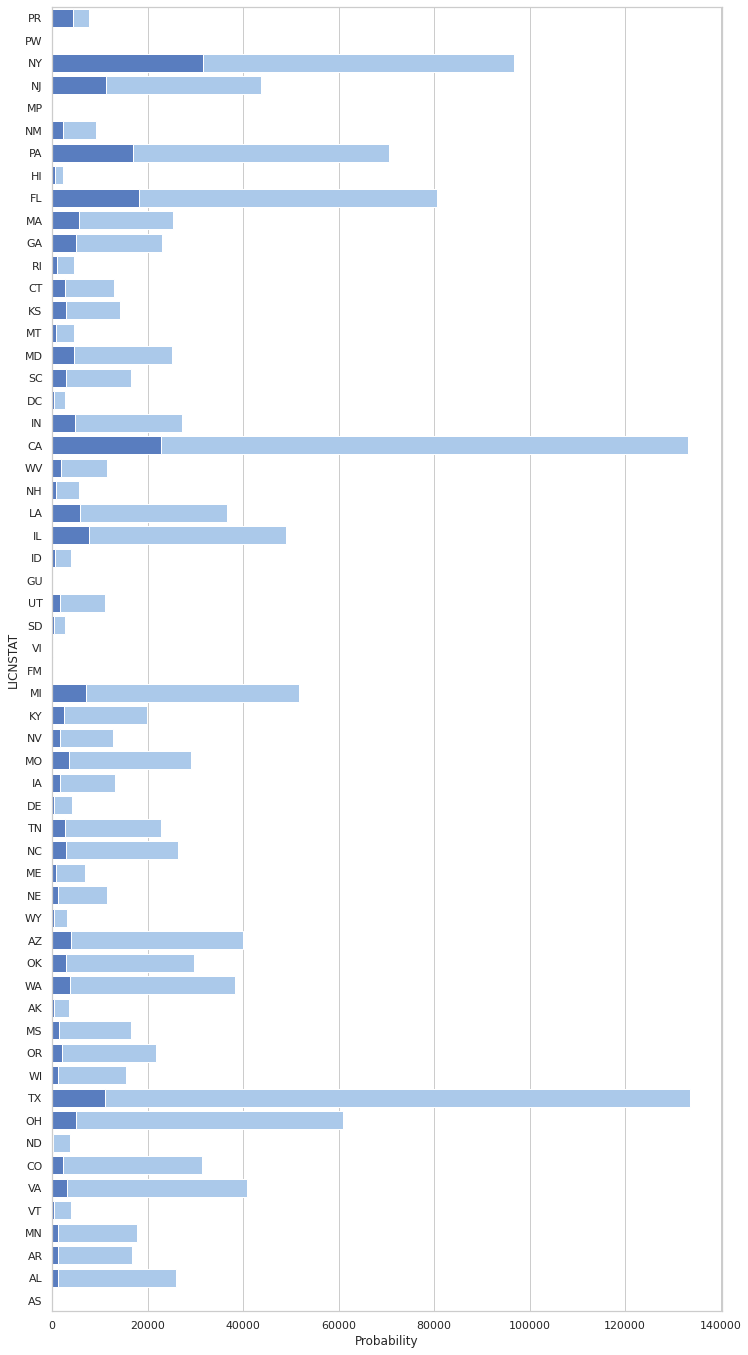

In [ ]:
fig, ax = plt.subplots(figsize=(12, 24))

sns.set_theme(style="whitegrid")

sns.set_color_codes("pastel")
chart_1 = sns.barplot(x="count", y="LICNSTAT", data=df, label="Total Allegations Reported", color="b")

sns.set_color_codes("muted")
chart_2 = sns.barplot(x="PMT", y="LICNSTAT", data=df, label="Number of Allegations Resulting in Payment", color="b")

chart_3 = sns.barplot(x="Probability", y="LICNSTAT", data=df, label="Probability", color="black")

chart_1.bar_label(chart_1.containers[2], padding = 685)

ax.legend(ncol=2, loc="right", frameon=True)
ax.set(ylabel="Licensing State", xlabel="Report Count")
sns.despine(left=True, bottom=True)